In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/USA_cars_datasets.csv')
df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [ ]:
selected_columns = ['brand', 'model', 'year','color']
data = df[selected_columns]
data=data.iloc[:50,:]
data.head()

,brand,model,year,color
0,toyota,cruiser,2008,black
1,ford,se,2011,silver
2,dodge,mpv,2018,silver
3,ford,door,2014,blue
4,chevrolet,1500,2018,red


In [ ]:
data.keys()

Index(['brand', 'model', 'year', 'color'], dtype='object')

In [ ]:
data.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new file
data.to_csv('cleaned.csv', index=False)

In [ ]:
data.head()

,brand,model,year,color
0,toyota,cruiser,2008,black
1,ford,se,2011,silver
2,dodge,mpv,2018,silver
3,ford,door,2014,blue
4,chevrolet,1500,2018,red


In [ ]:
# Extract relevant columns for car connections
data_author = df[['brand', 'model']]

unique_nodes = set(data['brand']).union(set(data['model']))
print(unique_nodes)

# Create an empty directed graph
graph = nx.DiGraph()

{'chrysler', 'kia', 'mercedes-benz', 'jeep', 'encore', 'wagon', 'srw', 'doors', 'pk', 'sorento', 'vans', 'malibu', 'chevrolet', 'door', '1500', 'q70', 'chassis', 'dodge', 'convertible', 'buick', 'ford', 'mpv', 'forte', 'compass', 'gmc', 'cruiser', 'coupe', 'camaro', 'se', 'infiniti', 'toyota'}


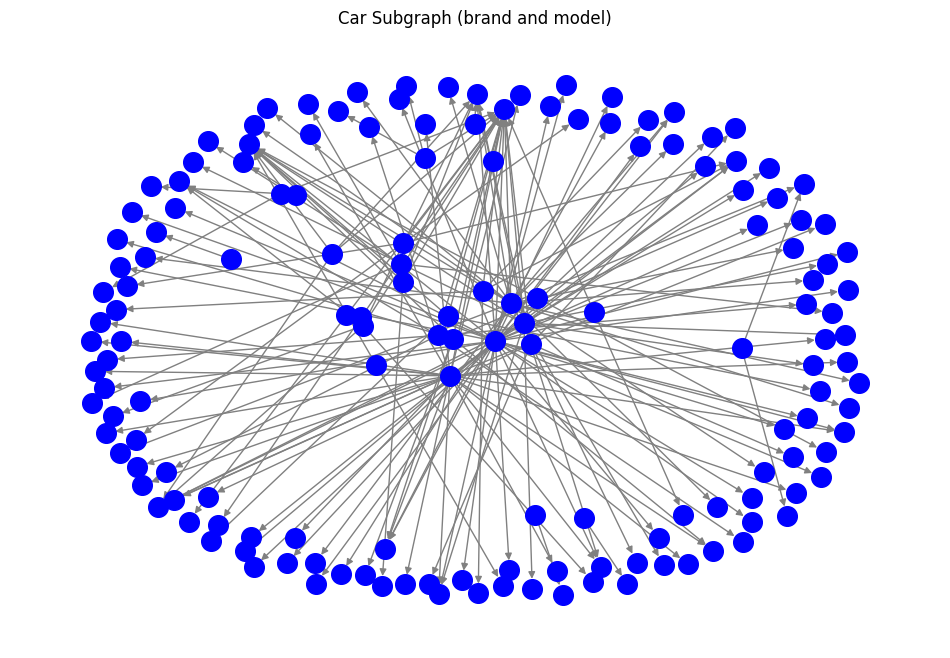

In [ ]:
# Add nodes to the graph
for _, row in data_author.iterrows():
    brand = row['brand']
    model = row['model']


    graph.add_node(brand)


    graph.add_node(model)


    graph.add_edge(brand, model)

# Visualize the graph
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 8))
nx.draw_networkx(graph, pos, with_labels=False, node_size=200, font_size=10, edge_color='gray', node_color='blue')  # Change node_color to 'blue'
plt.title('Car Subgraph (brand and model)')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


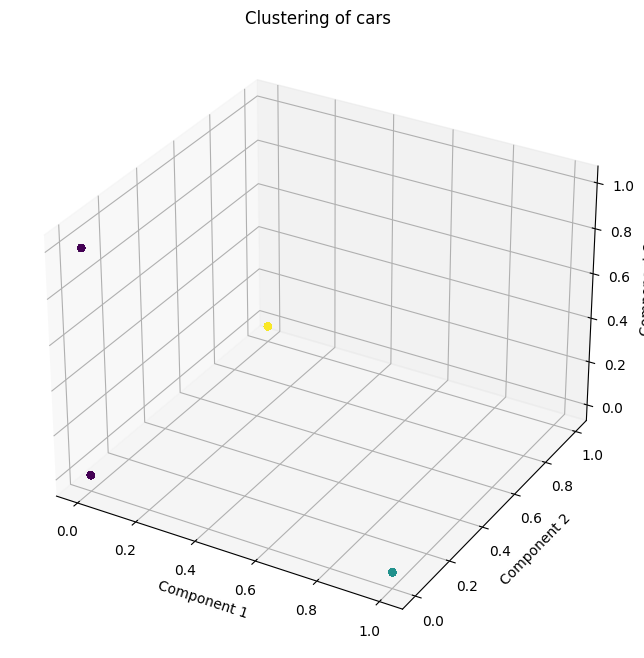

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plot functionality


node_features = np.array([len(graph[node]) for node in graph.nodes()]).reshape(-1, 1)

# Remove rows with NaN or null values
df.dropna(inplace=True)

# Select relevant features for clustering (e.g., abstracts)
data = df['state'].tolist()

# Vectorize the abstracts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

# Reduce dimensionality using Truncated SVD
svd = TruncatedSVD(n_components=3)
X_svd = svd.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_svd)

# Plot the clusters in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], c=labels, cmap='viridis')
ax.set_title('Clustering of cars')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

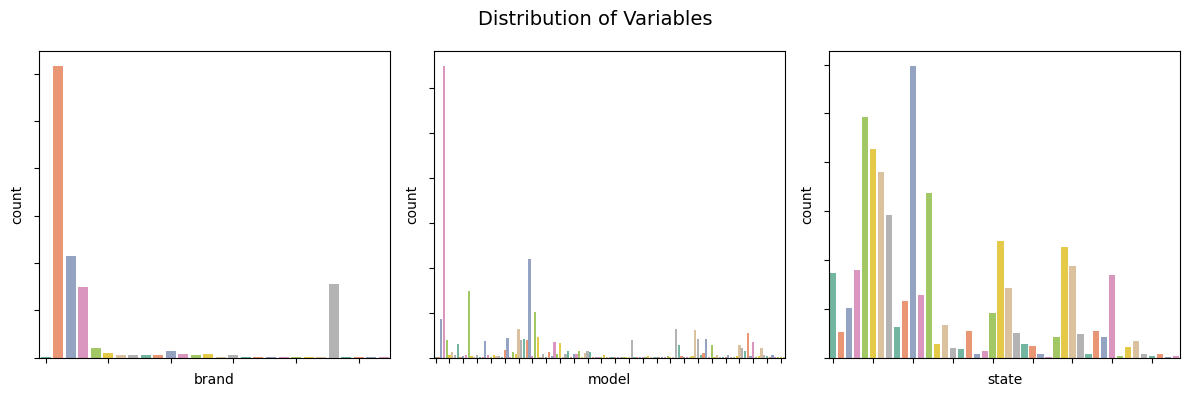

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_evaluate = ['brand', 'model', 'state']

# Specify the desired color palette
color_palette = 'Set2'  # Change this to the desired palette name

fig, axes = plt.subplots(1, len(columns_to_evaluate), figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(columns_to_evaluate):
    g = sns.countplot(x=col, data=df, ax=axes[i], palette=color_palette)
    if len(df[col].unique()) > 5:
        g.set_xticks(range(0, len(df[col].unique()), 5))
        g.set_xticklabels([])  # Remove x-axis labels

    g.set_yticklabels([])  # Remove y-axis labels

plt.subplots_adjust(wspace=0.3)  # Adjust spacing between subplots

plt.suptitle('Distribution of Variables', fontsize=14)
plt.tight_layout()
plt.show()